In [1]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.
c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
# load the dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
dataset.shape

(144, 1)

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

1

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist=model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2,)

Epoch 1/100
 - 0s - loss: 0.0630
Epoch 2/100
 - 0s - loss: 0.0607
Epoch 3/100
 - 0s - loss: 0.0586
Epoch 4/100
 - 0s - loss: 0.0565
Epoch 5/100
 - 0s - loss: 0.0544
Epoch 6/100
 - 0s - loss: 0.0525
Epoch 7/100
 - 0s - loss: 0.0505
Epoch 8/100
 - 0s - loss: 0.0487
Epoch 9/100
 - 0s - loss: 0.0468
Epoch 10/100
 - 0s - loss: 0.0450
Epoch 11/100
 - 0s - loss: 0.0433
Epoch 12/100
 - 0s - loss: 0.0417
Epoch 13/100
 - 0s - loss: 0.0401
Epoch 14/100
 - 0s - loss: 0.0386
Epoch 15/100
 - 0s - loss: 0.0371
Epoch 16/100
 - 0s - loss: 0.0357
Epoch 17/100
 - 0s - loss: 0.0343
Epoch 18/100
 - 0s - loss: 0.0330
Epoch 19/100
 - 0s - loss: 0.0318
Epoch 20/100
 - 0s - loss: 0.0306
Epoch 21/100
 - 0s - loss: 0.0294
Epoch 22/100
 - 0s - loss: 0.0284
Epoch 23/100
 - 0s - loss: 0.0274
Epoch 24/100
 - 0s - loss: 0.0264
Epoch 25/100
 - 0s - loss: 0.0255
Epoch 26/100
 - 0s - loss: 0.0245
Epoch 27/100
 - 0s - loss: 0.0237
Epoch 28/100
 - 0s - loss: 0.0229
Epoch 29/100
 - 0s - loss: 0.0222
Epoch 30/100
 - 0s - lo

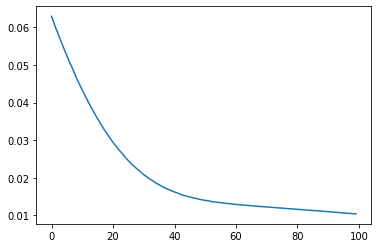

In [15]:
plt.plot(hist.history["loss"])